In [1]:
import os
import glob
import h5py
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from keras import backend as K

import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.core import Flatten, Dense, Activation, Reshape

import tensorflow as tf
import yolo.config as cfg
from utils.help import say, convert_darkweights2keras

Using TensorFlow backend.


In [6]:
weights_path = 'models/pretrain/yolo-tiny-origin-tfdim-named.h5'
is_freeze = True

In [3]:
model = Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(448,448, 3),padding='same', 
                        activation=LeakyReLU(alpha=0.1), trainable=not is_freeze, name='conv1'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,(3,3), padding='same', 
                        activation=LeakyReLU(alpha=0.1), trainable=not is_freeze, name='conv2'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Conv2D(64,(3,3), padding='same', 
                        activation=LeakyReLU(alpha=0.1), trainable=not is_freeze, name='conv3'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Conv2D(128,(3,3), padding='same', 
                        activation=LeakyReLU(alpha=0.1), trainable=not is_freeze, name='conv4'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Conv2D(256,(3,3), padding='same', 
                        activation=LeakyReLU(alpha=0.1), trainable=not is_freeze, name='conv5'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Conv2D(512,(3,3), padding='same', 
                        activation=LeakyReLU(alpha=0.1), trainable=not is_freeze, name='conv6'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Conv2D(1024,(3,3), padding='same', activation=LeakyReLU(alpha=0.1), trainable=not is_freeze, name='conv7'))
model.add(Conv2D(1024,(3,3), padding='same', activation=LeakyReLU(alpha=0.1), trainable=not is_freeze, name='conv8'))
model.add(Conv2D(1024,(3,3), padding='same', activation=LeakyReLU(alpha=0.1), trainable=not is_freeze, name='conv9'))
model.add(Flatten())
model.add(Dense(256, name='dense1'))
model.add(Dense(4096, name='dense2'))
model.add(LeakyReLU(alpha=0.1, name='leaky_relu1'))
model.add(Dense(1470, name='detection'))

In [7]:
model.load_weights(weights_path)

In [8]:
from utils.BoxUtils import post_progress

base :  3
('aeroplane', (254.0, 254.0, 254))
('bicycle', (239.88888888888889, 211.66666666666669, 127))
('bird', (225.77777777777777, 169.33333333333334, 0))
('boat', (211.66666666666669, 127.0, 254))
('bottle', (197.55555555555557, 84.66666666666667, 127))
('bus', (183.44444444444443, 42.33333333333332, 0))
('car', (169.33333333333334, 0.0, 254))
('cat', (155.22222222222223, -42.33333333333335, 127))
('chair', (141.11111111111111, -84.66666666666664, 0))
('cow', (127.0, 254.0, 254))
('diningtable', (112.88888888888889, 211.66666666666669, 127))
('dog', (98.77777777777777, 169.33333333333334, 0))
('horse', (84.66666666666667, 127.0, 254))
('motorbike', (70.55555555555556, 84.66666666666667, 127))
('person', (56.44444444444444, 42.33333333333332, 0))
('pottedplant', (42.33333333333332, 0.0, 254))
('sheep', (28.222222222222236, -42.33333333333335, 127))
('sofa', (14.111111111111118, -84.66666666666664, 0))
('train', (0.0, 254.0, 254))
('tvmonitor', (-14.111111111111118, 211.6666666666666

In [9]:
from yolo.process import preprocess

## Conv Layer 는 th->tf 변환, Dense 는 변하지 않았기 때문에 결과는 똑바로 나오지 않는다.
아랫부분은 내가 학습시키는게 필요할 것 같다.

1 <class 'numpy.ndarray'> (424, 640, 3)
2 (448, 448, 3)
0.749019607843
4 (1, 448, 448, 3)
5 (1, 1470)
6 (424, 640, 3)


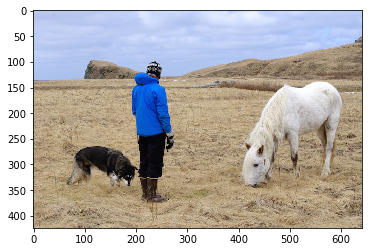

In [10]:
imagePath = './test/my_testset/person.jpg'
image = cv2.imread(imagePath)
print("1", type(image), image.shape)
processed_img = preprocess(image) # 여기에서 이미 kernel dependency image dims 와 image normalization 을 수행한다.
print("2", processed_img.shape)
print(processed_img[0][0][0])
batch = np.expand_dims(processed_img, axis=0)
print("4", batch.shape)
out = model.predict(batch)
print("5", out.shape)
out_img = post_progress(out[0], im=image, is_save=False, threshold=0.1)
print("6", out_img.shape)
out_img = cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB)
plt.imshow(out_img)